In [68]:
%load_ext autoreload
%autoreload 2

import os
from collections import deque
from datetime import datetime

import numpy as np
import torch
import torchvision.ops.boxes as bops
from PIL import Image
from torchvision.models.detection import *
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.utils import draw_bounding_boxes

from detector import Detector

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Total duration: 150.908 ms


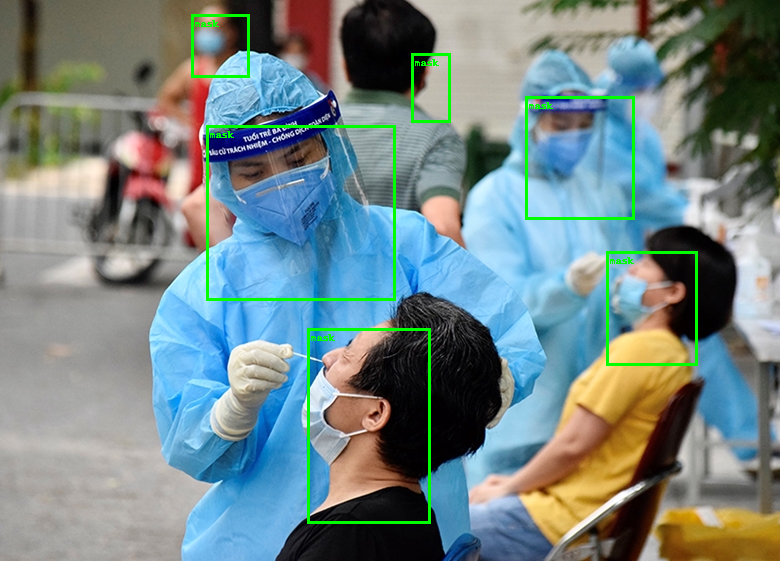

In [71]:
detector = Detector(model_name='faster_rcnn')

input_img = Image.open('input/duy-khanhs.jpg')

input_array = np.asarray(input_img)

res = detector.detect(input_array)

output_img = Image.fromarray(res)

display(output_img)


In [12]:
img_tensor = torch.from_numpy(input_array).permute(2, 0, 1).to('cuda')

input_tensor = img_tensor / 255

# img_tensor = img_tensor.view(img_tensor.size(0), -1)
# img_tensor -= img_tensor.min(1, keepdim=True)[0]
# img_tensor /= img_tensor.max(1, keepdim=True)[0]
# img_tensor = img_tensor.view(batch_size, height, width)

print(input_tensor)

print(input_tensor.size())
print(input_tensor.dtype)

with torch.no_grad():
    predictions = detector.model([input_tensor])

tensor([[[0.3490, 0.3647, 0.3569,  ..., 0.0549, 0.0549, 0.0471],
         [0.3608, 0.3686, 0.3569,  ..., 0.0510, 0.0549, 0.0549],
         [0.3765, 0.3647, 0.3529,  ..., 0.0510, 0.0588, 0.0549],
         ...,
         [0.6314, 0.6353, 0.6275,  ..., 0.5216, 0.5255, 0.5216],
         [0.6275, 0.6235, 0.6196,  ..., 0.5216, 0.5373, 0.5176],
         [0.6235, 0.6235, 0.6314,  ..., 0.5451, 0.5373, 0.5333]],

        [[0.3373, 0.3569, 0.3490,  ..., 0.1059, 0.1059, 0.0980],
         [0.3490, 0.3569, 0.3490,  ..., 0.1020, 0.1059, 0.1059],
         [0.3647, 0.3529, 0.3412,  ..., 0.1098, 0.1098, 0.1059],
         ...,
         [0.6118, 0.6157, 0.6078,  ..., 0.3333, 0.3412, 0.3451],
         [0.6078, 0.6039, 0.6000,  ..., 0.3333, 0.3529, 0.3412],
         [0.6039, 0.6039, 0.6118,  ..., 0.3569, 0.3529, 0.3490]],

        [[0.2784, 0.2980, 0.2902,  ..., 0.0353, 0.0353, 0.0275],
         [0.2902, 0.2980, 0.2902,  ..., 0.0314, 0.0353, 0.0353],
         [0.3059, 0.2941, 0.2824,  ..., 0.0275, 0.0392, 0.

In [16]:
predictions[0]

{'boxes': tensor([[525.0771,  96.3824, 634.0656, 219.6641],
         [191.1954,  14.4750, 249.0350,  77.5996],
         [206.4760, 125.7024, 395.9662, 300.7075],
         [606.6715, 251.4479, 697.8262, 365.9276],
         [411.9810,  53.6018, 450.5512, 122.0922],
         [307.6430, 328.9092, 430.9733, 523.6003],
         [308.8498, 349.6189, 404.5974, 500.2626],
         [318.9285, 307.6521, 552.4808, 524.4673],
         [610.4709, 237.3287, 753.3511, 379.4633],
         [607.0799,  42.5457, 692.5947, 145.8939],
         [417.7325,  58.7704, 440.5147, 116.3353],
         [402.9556,  41.3401, 461.9986, 132.9323],
         [184.0646,   0.0000, 272.0565,  91.4446],
         [428.0804, 319.5971, 563.3021, 507.2540],
         [194.0643, 153.1643, 334.6332, 279.5616],
         [614.0462, 256.3950, 694.2820, 355.9443],
         [303.5593, 347.2276, 388.9814, 478.4351],
         [399.6728,  39.7960, 459.1181, 137.1018],
         [311.0532, 319.6505, 449.8949, 521.4825],
         [307.8036, 30

In [65]:
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']
labels = predictions[0]['labels']

mask = scores > 0.5

mask = mask[:, None].repeat(1, 4)



print(mask.size())
# print(mask)

print(boxes.size())

print(masked_boxes.size(0) // 4, 4)

masked_boxes = boxes[mask]
masked_boxes = torch.reshape(masked_boxes, (masked_boxes.size(0) // 4, 4))

print(masked_boxes)


# masked_boxes = torch.unsqueeze(masked_boxes, dim=1)
print(masked_boxes.size())

names = ['', 'mask', 'incorrect_mask', 'no_mask']

labels = labels[:masked_boxes.size(0)]

print(labels)


box_labels = [names[int(x)] for x in labels]
# box_colors = [colors[int(x)] for x in labels]


torch.Size([23, 4])
torch.Size([23, 4])
1 4
tensor([[525.0771,  96.3824, 634.0656, 219.6641],
        [191.1954,  14.4750, 249.0350,  77.5996],
        [206.4760, 125.7024, 395.9662, 300.7075],
        [606.6715, 251.4479, 697.8262, 365.9276],
        [411.9810,  53.6018, 450.5512, 122.0922],
        [307.6430, 328.9092, 430.9733, 523.6003]], device='cuda:0')
torch.Size([6, 4])
tensor([2, 2, 2, 2, 2, 2], device='cuda:0')


In [76]:
valid_tensor = torch.tensor([[True], [False], [False], [False], [False]])

valid_tensor = torch.tensor([[False]] * 5)

valid_tensor[2, 0] = True


a = torch.tensor([[i, i] for i in range(5)])


print(a.size())
print(valid_tensor)

print(any(valid_tensor))



# print(a, valid_tensor)

# print(torch.masked(a, valid_tensor))

b = a[valid_tensor.repeat(1, 2)]

torch.unsqueeze(b, dim=0)


# print(a[valid_tensor > 0])

torch.Size([5, 2])
tensor([[False],
        [False],
        [ True],
        [False],
        [False]])
True


tensor([[2, 2]])

In [20]:
type(output.imgs[0])

numpy.ndarray

In [19]:
output2 = detector.model(input_img)

type(output2.imgs[0])

numpy.ndarray

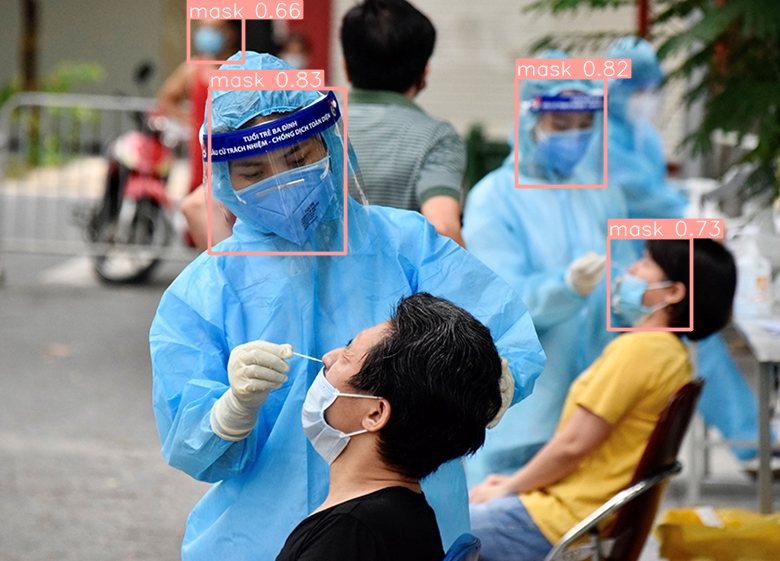

In [22]:
display(Image.fromarray(output2.render()[0]))

In [26]:
output2.pred[0].shape

torch.Size([4, 6])

tensor([[2.09292e+02, 8.89719e+01, 3.45122e+02, 2.53552e+02, 8.31639e-01, 1.00000e+00],
        [5.16713e+02, 7.79503e+01, 6.05796e+02, 1.86204e+02, 8.22535e-01, 1.00000e+00],
        [6.08899e+02, 2.37727e+02, 6.91965e+02, 3.29140e+02, 7.29291e-01, 1.00000e+00],
        [1.88481e+02, 0.00000e+00, 2.43775e+02, 6.20683e+01, 6.58048e-01, 1.00000e+00]], device='cuda:0')
torch.Size([4, 4])
['no_mask', 'mask', 'incorrect_mask']


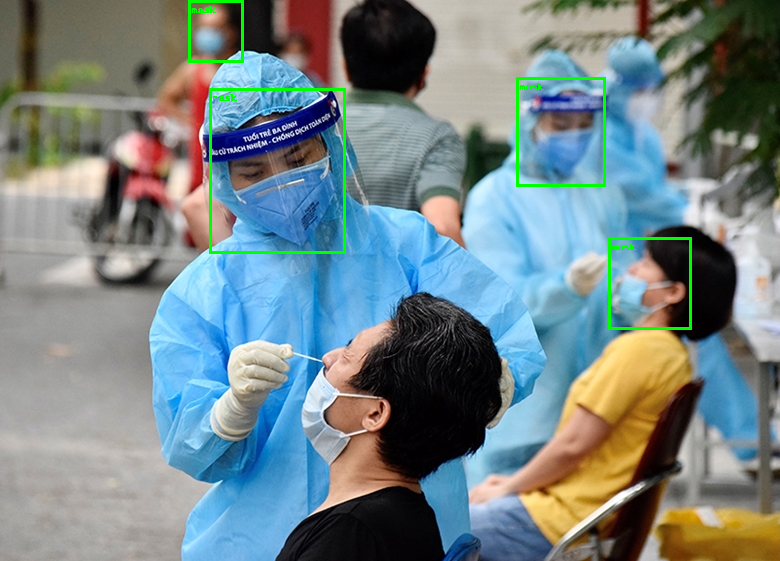

In [87]:
input_tensor = torch.from_numpy(input_array).permute(2, 0, 1)



# print(output2.names)

print(output2.pred[0])

print(output2.pred[0][:, :-2].size())

print(output2.names)

labels = [output2.names[int(x)] for x in output2.pred[0][:, -1]]
colors = [(255, 0, 0), (0, 255, 0), (128, 0, 128)]

box_colors = [colors[int(x)] for x in output2.pred[0][:, -1]]

out = draw_bounding_boxes(input_tensor, boxes=output2.pred[0][:, :-2], labels=labels, colors=box_colors, width=3)

# display(Image.fromarray(out))


import torchvision.transforms.functional as F
# load the image (creating a random image as an example)
# img_data = torch.ByteTensor(4, 4, 3).random_(0, 255).numpy()

img_data = out.permute(1, 2, 0).numpy()
pil_image = F.to_pil_image(img_data)

display(pil_image)
